In [2]:
import numpy as np
import pandas as pd
print("success!")

success!


In [3]:
df = pd.read_csv('../capstone_2/mj_stats.csv', parse_dates=['Date'])
df.head()

,EndYear,Rk,G,Date,Years,Days,Age,Tm,Home,Opp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1985,1,1,1984-10-26,21,252,21.689938,CHI,1,WSB,...,1,5,6,7,2,4,5,2,16,12.5
1,1985,2,2,1984-10-27,21,253,21.692676,CHI,0,MIL,...,3,2,5,5,2,1,3,4,21,19.4
2,1985,3,3,1984-10-29,21,255,21.698152,CHI,1,MIL,...,2,2,4,5,6,2,3,4,37,32.9
3,1985,4,4,1984-10-30,21,256,21.700890,CHI,0,KCK,...,2,2,4,5,3,1,6,5,25,14.7
4,1985,5,5,1984-11-01,21,258,21.706366,CHI,0,DEN,...,3,2,5,5,1,1,2,4,17,13.2


In [4]:
num_rows, num_columns = df.shape

num_rows, num_columns

(1072, 33)

In [5]:
missing_values = df.isnull().sum()

missing_values[missing_values > 0]

3P_PCT    330
FT_PCT     30
dtype: int64

In [6]:
basic_stats = df.describe()

basic_stats

,EndYear,Rk,G,Years,Days,Age,Home,Win,Diff,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,1992.888060,39.573694,39.573694,29.277985,201.629664,29.830017,0.500000,0.658582,4.866604,0.969216,...,1.555970,4.667910,6.223881,5.254664,2.345149,0.833022,2.727612,2.596082,30.123134,23.440951
std,5.361669,23.647627,23.647627,5.350738,137.575668,5.355281,0.500233,0.474407,12.812806,0.172811,...,1.442532,2.569624,3.016647,2.722709,1.656353,1.011194,1.733523,1.391619,9.752002,9.487120
min,1985.000000,1.000000,1.000000,21.000000,0.000000,21.689938,0.000000,0.000000,-44.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-1.400000
25%,1989.000000,18.000000,18.000000,25.000000,42.000000,25.732375,0.000000,0.000000,-4.000000,1.000000,...,0.000000,3.000000,4.000000,3.000000,1.000000,0.000000,1.000000,2.000000,23.000000,16.800000
50%,1992.000000,39.000000,39.000000,28.000000,274.000000,28.862423,0.500000,1.000000,5.000000,1.000000,...,1.000000,4.000000,6.000000,5.000000,2.000000,1.000000,3.000000,3.000000,30.000000,23.450000
75%,1997.000000,60.000000,60.000000,33.000000,320.000000,33.918549,1.000000,1.000000,13.000000,1.000000,...,2.000000,6.000000,8.000000,7.000000,3.000000,1.000000,4.000000,4.000000,36.000000,29.600000
max,2003.000000,82.000000,82.000000,40.000000,365.000000,40.158795,1.000000,1.000000,47.000000,1.000000,...,8.000000,14.000000,18.000000,17.000000,10.000000,6.000000,9.000000,6.000000,69.000000,64.600000


In [7]:
df.dtypes

EndYear             int64
Rk                  int64
G                   int64
Date       datetime64[ns]
Years               int64
Days                int64
Age               float64
Tm                 object
Home                int64
Opp                object
Win                 int64
Diff                int64
GS                  int64
MP                  int64
FG                  int64
FGA                 int64
FG_PCT            float64
3P                  int64
3PA                 int64
3P_PCT            float64
FT                  int64
FTA                 int64
FT_PCT            float64
ORB                 int64
DRB                 int64
TRB                 int64
AST                 int64
STL                 int64
BLK                 int64
TOV                 int64
PF                  int64
PTS                 int64
GmSc              float64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
print("success!")

success!


In [9]:
df = df[['G','Date', 'Age', 'MP', 'FG_PCT', 'FT_PCT', 'PTS', 'GmSc', 'Home', 'Win', 'Opp', '3P', "TOV"]]
df['year'] = df['Date'].dt.year
df['Age'] = df['Age'].astype('int')
df.head()

,G,Date,Age,MP,FG_PCT,FT_PCT,PTS,GmSc,Home,Win,Opp,3P,TOV,year
0,1,1984-10-26,21,40,0.313,0.857,16,12.5,1,1,WSB,0,5,1984
1,2,1984-10-27,21,34,0.615,1.000,21,19.4,0,0,MIL,0,3,1984
2,3,1984-10-29,21,34,0.542,0.846,37,32.9,1,1,MIL,0,3,1984
3,4,1984-10-30,21,36,0.381,1.000,25,14.7,0,1,KCK,0,6,1984
4,5,1984-11-01,21,33,0.467,0.750,17,13.2,0,0,DEN,0,2,1984


In [10]:
#groupby for avg efficiency for each year (age)

df1 = df[['Age', 'GmSc','PTS']]
year_eff = df1.groupby('Age').agg([np.mean])
age = year_eff.index
gmsc = year_eff['GmSc']
pts = year_eff['PTS']

# getting the highest and lowest eff
lowest_eff = year_eff["GmSc"].min()
year_of_lowest_eff = year_eff[['GmSc']].idxmin()

max_eff = year_eff['GmSc'].max()
year_of_max_eff = year_eff[['GmSc']].idxmax()

<function matplotlib.pyplot.show(close=None, block=None)>

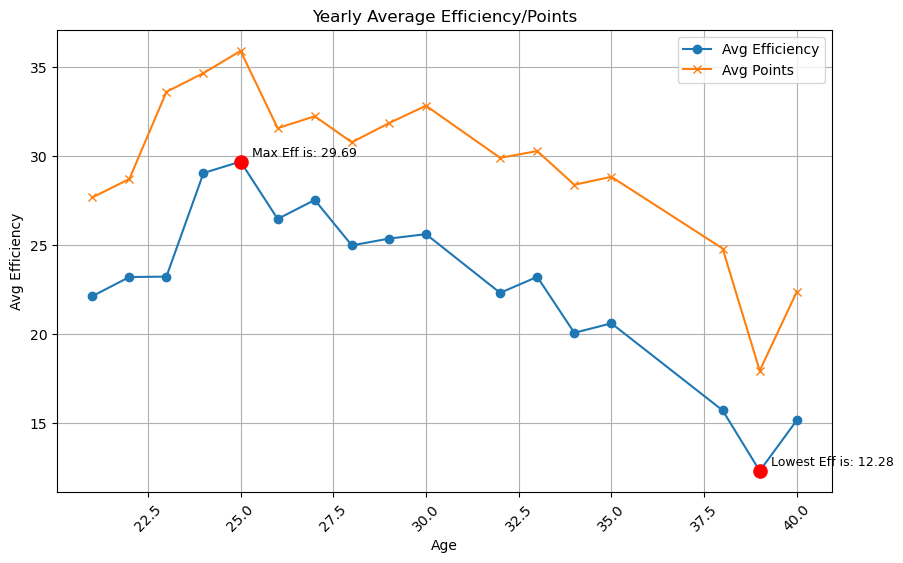

In [11]:
# plotting avg efficiency per year(age)

plt.figure(figsize=(10,6))
plt.plot(age,gmsc, marker = 'o')
plt.plot(age,pts, marker = 'x')
plt.xlabel("Age")
plt.ylabel("Avg Efficiency")
plt.title("Yearly Average Efficiency/Points")
plt.grid(True)
plt.xticks(rotation = 45) 
plt.legend(["Avg Efficiency", "Avg Points"])

plt.scatter(year_of_lowest_eff,lowest_eff, color='red', s=90, zorder = 10)
plt.scatter(year_of_max_eff,max_eff, color='red', s=90, zorder = 10)
plt.text(year_of_max_eff[0]+0.3, max_eff[0]+0.3, "Max Eff is: " + str(float("{:.2f}".format(max_eff[0]))),fontsize=9)
plt.text(year_of_lowest_eff[0]+0.3, lowest_eff[0]+0.3, "Lowest Eff is: " + str(float("{:.2f}".format(lowest_eff[0]))),fontsize=9)

plt.show

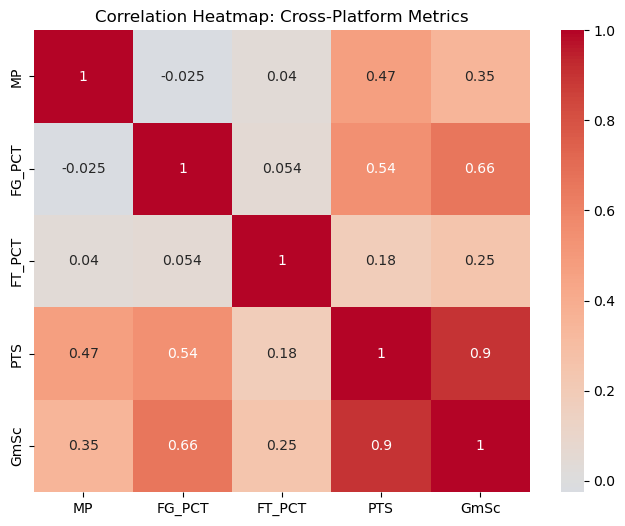

In [18]:
df2 = df[['MP','FG_PCT','FT_PCT','PTS','GmSc']] 


# correlation matrix
correlation_matrix = df2.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()

/var/folders/kn/mb5t0rb14hsd67lbcns9_3fr0000gn/T/ipykernel_10316/3872913556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month'] = df3['Date'].dt.month
/var/folders/kn/mb5t0rb14hsd67lbcns9_3fr0000gn/T/ipykernel_10316/3872913556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = df3['Date'].dt.year


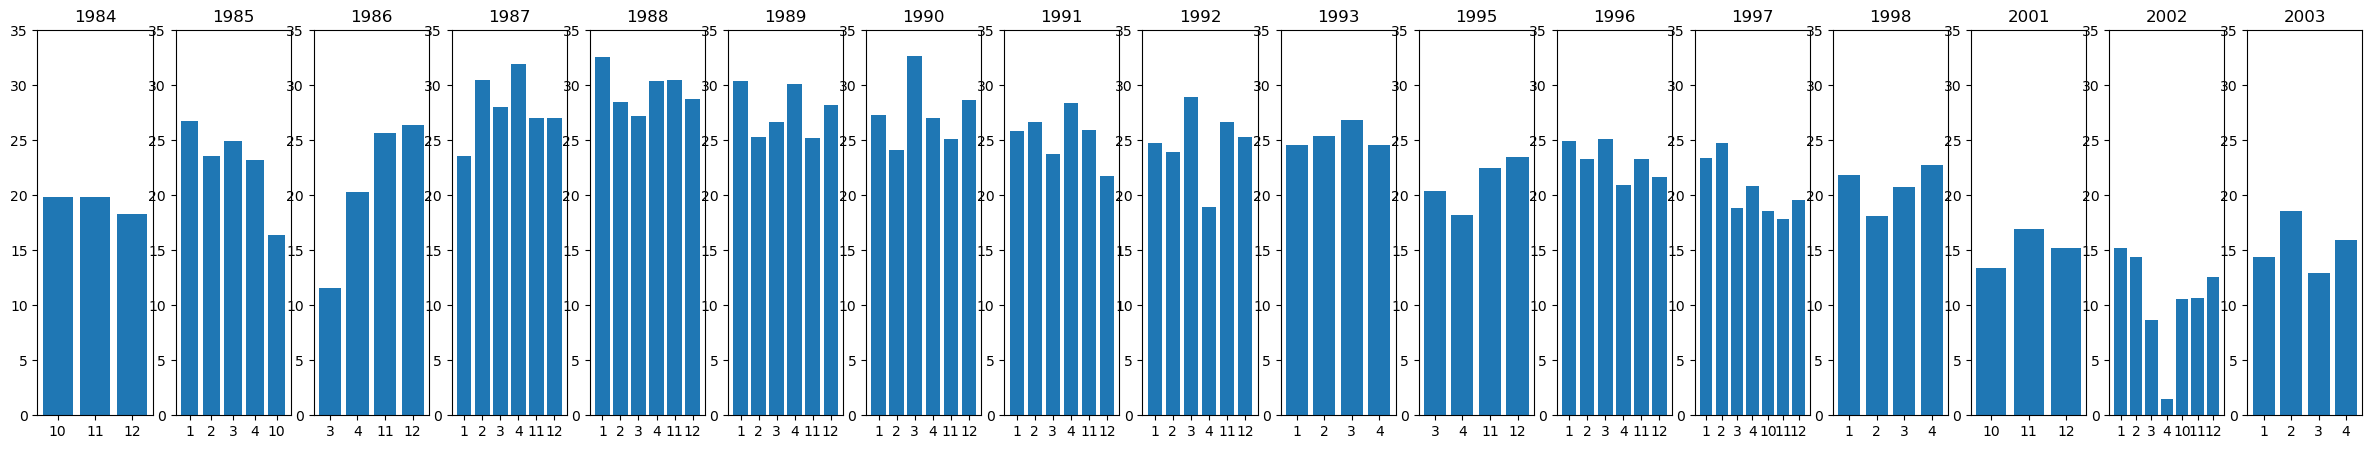

In [11]:
# Monthwise stats efficiency for each year

df3 = df[['Date','GmSc']]
df3['month'] = df3['Date'].dt.month
df3['year'] = df3['Date'].dt.year
gb3 = df3.groupby('year')


list_of_all_the_years = df3['year'].unique()

fig, ax = plt.subplots(nrows=1, ncols=len(list_of_all_the_years), figsize=(30,5))

for count, year in enumerate(list_of_all_the_years):
  # for each year
  month_list = []
  efficiency_list = []

  gb_years = gb3.get_group(year)
  gb_month = gb_years.groupby('month')
  each_months = gb_years['month'].unique()
  for month in each_months:
    # for each month in year
    efficiency = gb_month.get_group(month).agg([np.mean])['GmSc'][0]
    month_list.append(str(month))
    efficiency_list.append(efficiency)

  ax[count].bar(month_list, efficiency_list)
  ax[count].set_title(str(year))
  ax[count].set_ylim(0, 35)
plt.show()


In [12]:
# Home v Away 
# efficiency and points 

df4 = df[['PTS', 'GmSc', 'Home', 'Win']]
idx_home = (df['Home']==1)
df4_home = df4[idx_home]

won_home = df4_home['Win'].sum()
lost_home = len(df4_home) - won_home

idx_away = (df['Home'] == 0)
df4_away = df4[idx_away]
won_away = df4_away['Win'].sum()
lost_away = len(df4_away) - won_away


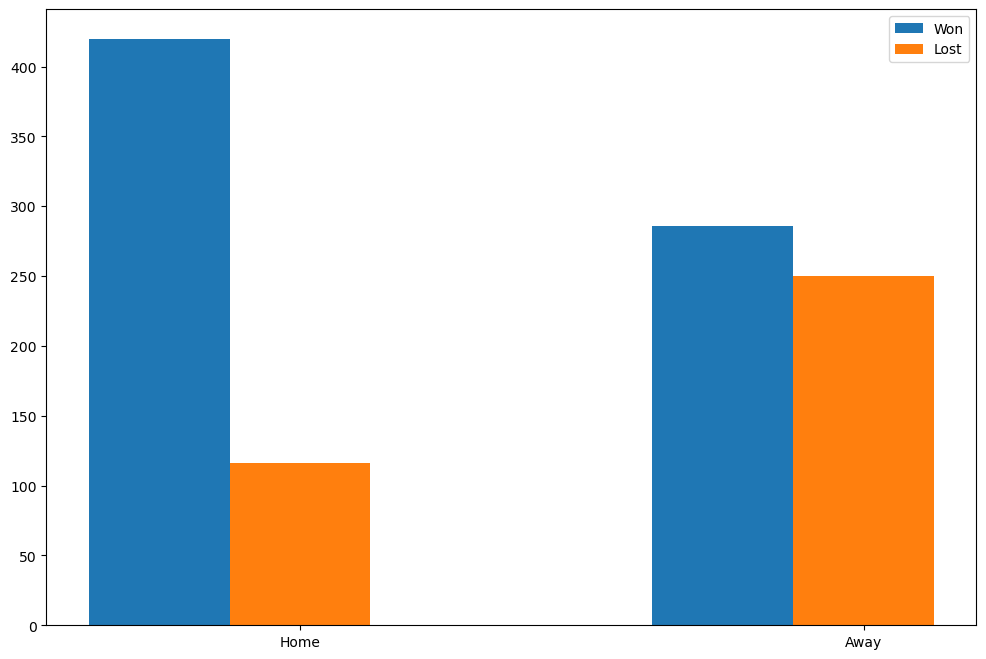

In [21]:
data = [[won_home,lost_home],[won_away,lost_away]]

fig = plt.subplots(figsize =(12, 8)) 
bar_width = 0.25
matches_won = [won_home,won_away]
matches_lost = [lost_home, lost_away]

# position of both bars in HOME and AWAY, setting x-axis
first_bar = np.arange(len(matches_won)) 
second_bar = [x + bar_width for x in first_bar] 

plt.bar(first_bar, matches_won, bar_width, label="Won")
plt.bar(second_bar, matches_lost, bar_width, label="Lost")

plt.xticks([r + bar_width for r in range(len(matches_won))], ['Home', 'Away'])

plt.legend()
plt.show()

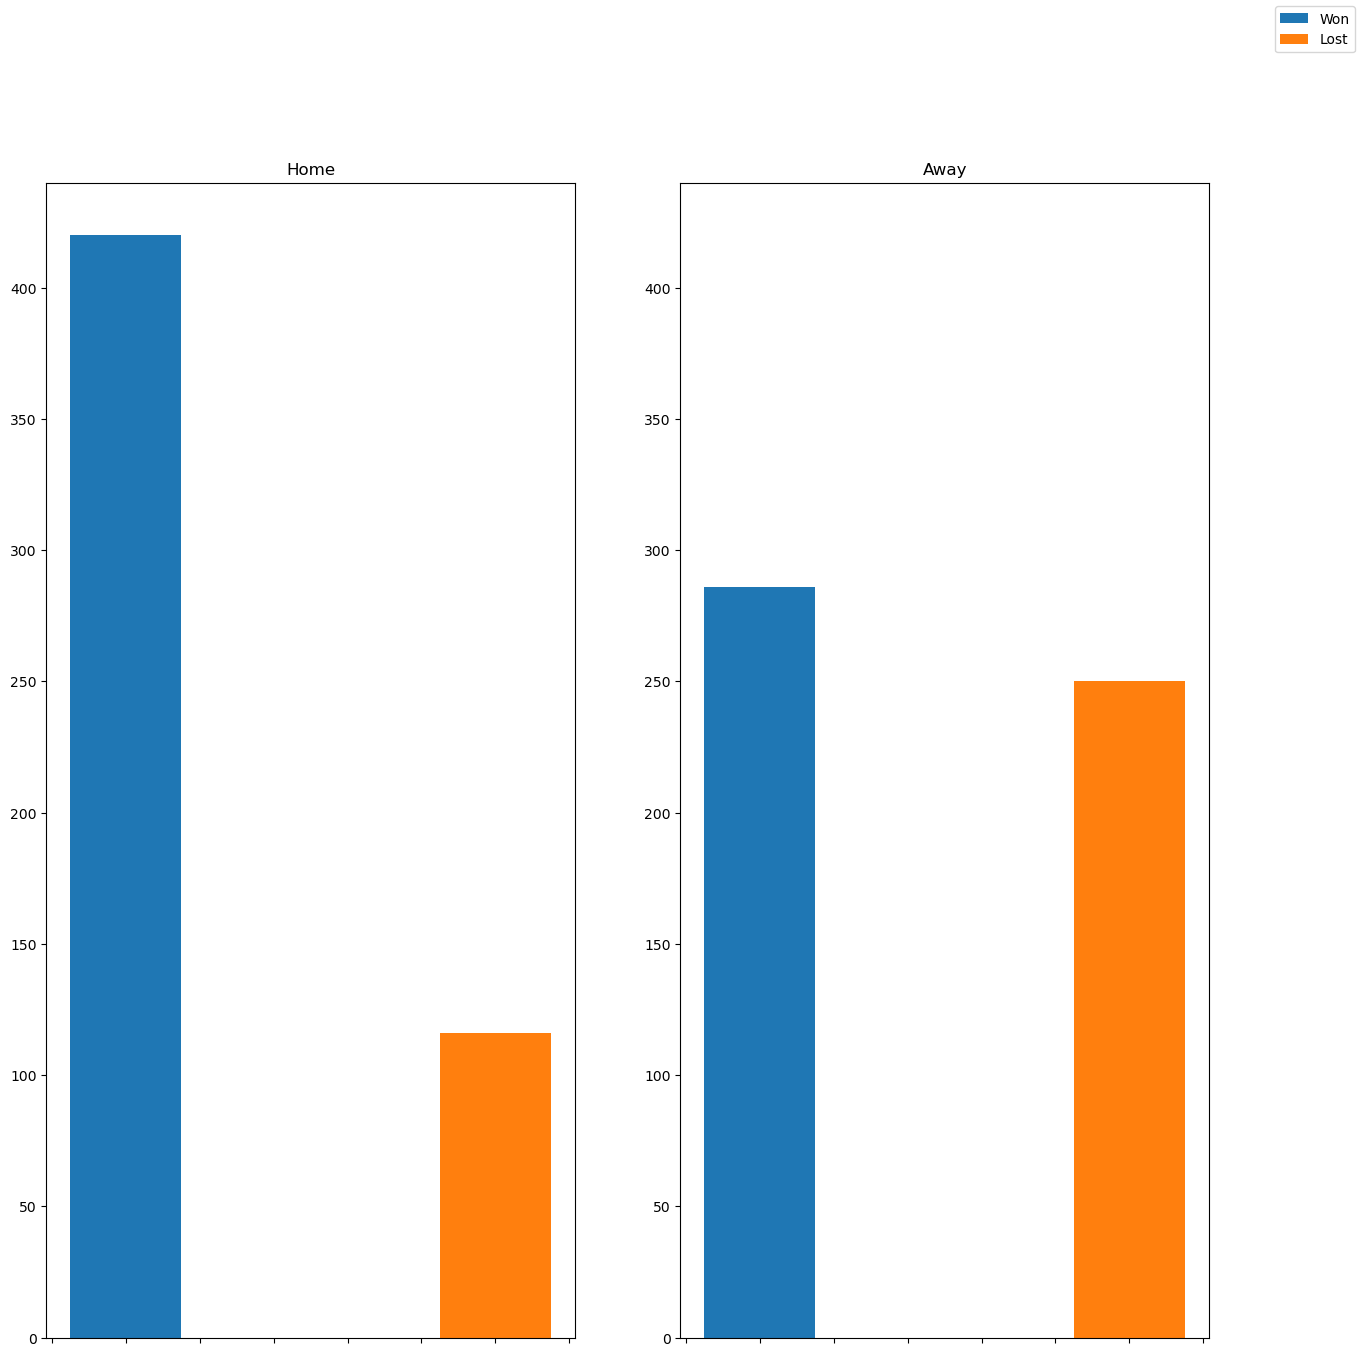

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,15))

bar_width = 0.3
set_ylim = max([won_home, lost_home, won_away, lost_away]) + 20

ax[0].bar(0, won_home, bar_width, label = "Won")
ax[0].bar(1, lost_home, bar_width, label = "Lost")
ax[0].tick_params(labelbottom = False)
ax[0].set_title("Home")
ax[0].set_ylim(0,set_ylim)
ax[0].tick_params(labelbottom = False)

ax[1].bar(0, won_away, bar_width)
ax[1].bar(1, lost_away,bar_width)
ax[1].tick_params(labelbottom = False)
ax[1].set_title("Away")
ax[1].set_ylim(0,set_ylim)
ax[1].tick_params(labelbottom = False)

fig.legend()

In [13]:
# Opp to GMSC (strongest and weakest)

df5 = df[['Opp', 'GmSc']]
top_10_opp = df5.Opp.value_counts().index
top_10_opp = list(top_10_opp)

idx = (df5)['Opp'].isin(top_10_opp)

top_10_opp_teams = df5[idx]

sorted_top_10 = top_10_opp_teams.groupby("Opp").agg([np.mean]).sort_values([("GmSc", "mean")], ascending = True)

least_efficient = sorted_top_10.iloc[1,:]
most_efficient = sorted_top_10.iloc[-1,:]
print(least_efficient)
print(most_efficient)

GmSc  mean    15.731579
Name: TOR, dtype: float64
GmSc  mean    26.041667
Name: POR, dtype: float64


<BarContainer object of 33 artists>

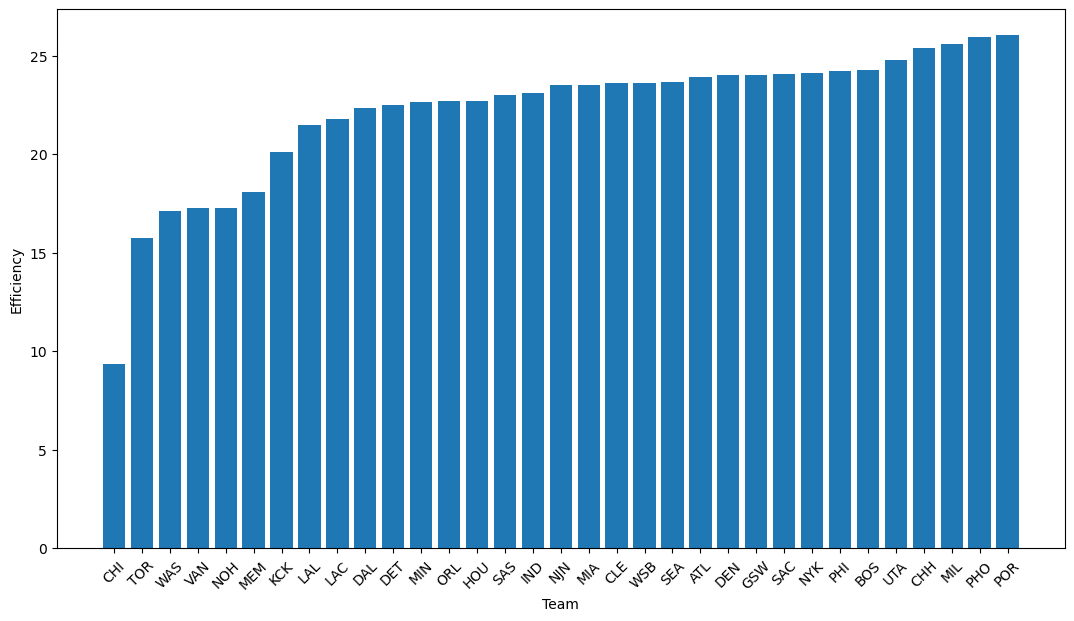

In [14]:
sorted_top_10_keys = sorted_top_10.index
sorted_top_10_values = sorted_top_10.values

plt.figure(figsize = (13,7))
plt.xticks(rotation = 45)
plt.xlabel("Team")
plt.ylabel("Efficiency")
plt.bar(sorted_top_10_keys, sorted_top_10_values.flatten())


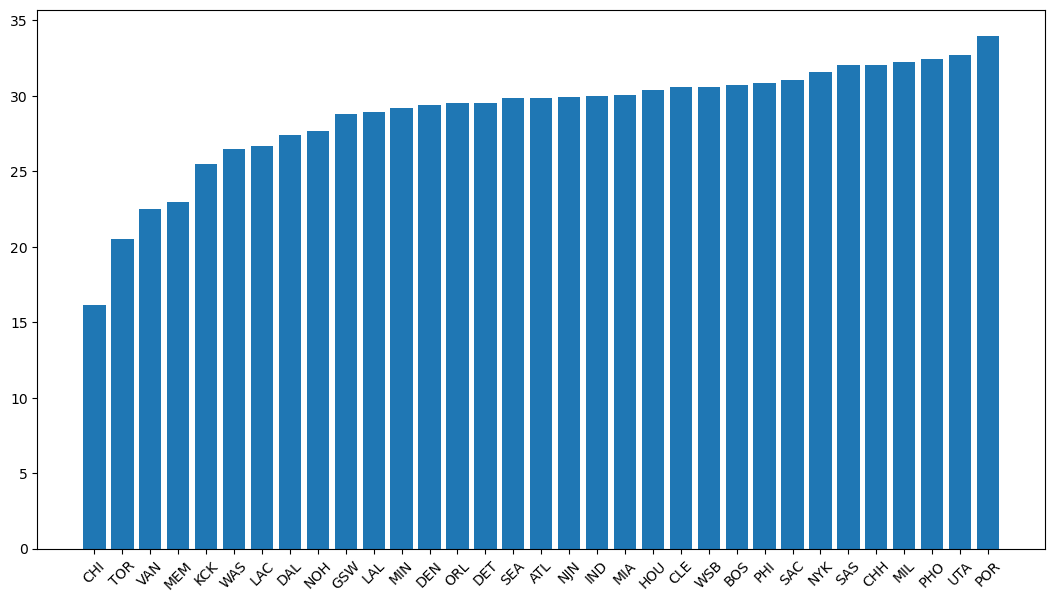

In [22]:
def oppo_graphs(metric, type="line"):
  # bar, plot (line graph)

  df5 = df[['Opp',metric]]
  top_10_opp = df5.Opp.value_counts().index 
  top_10_opp = list(top_10_opp)
  idx  = df5['Opp'].isin(top_10_opp)
  top_10_opp_teams = df5[idx]
  sorted_top_10 = top_10_opp_teams.groupby('Opp').agg([np.mean]).sort_values([(metric,"mean")], axis = 0, ascending = True)
  least_efficient = sorted_top_10.iloc[0,:]
  most_efficient = sorted_top_10.iloc[-1,:]
  sorted_top_10_keys = sorted_top_10.index
  sorted_top_10_values = sorted_top_10.values

  plt.figure(figsize=(13,7))
  plt.xticks(rotation = 45)

  if type=="bar":
    plt.bar(sorted_top_10_keys, sorted_top_10_values.flatten())
  else:
    plt.plot(sorted_top_10_keys, sorted_top_10_values.flatten())
    
oppo_graphs("PTS", "bar")

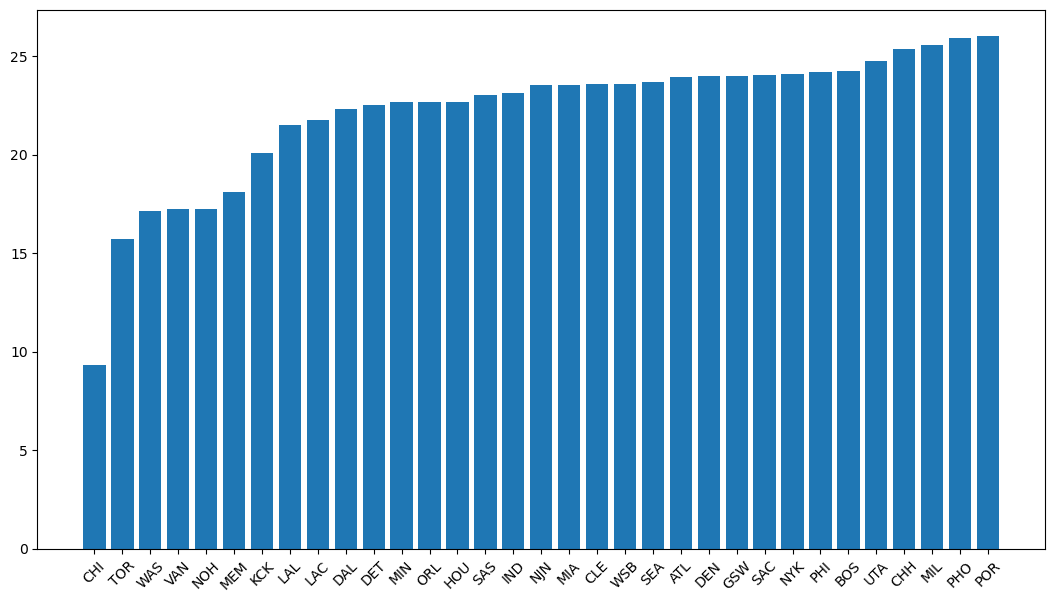

In [23]:
oppo_graphs("GmSc", "bar")

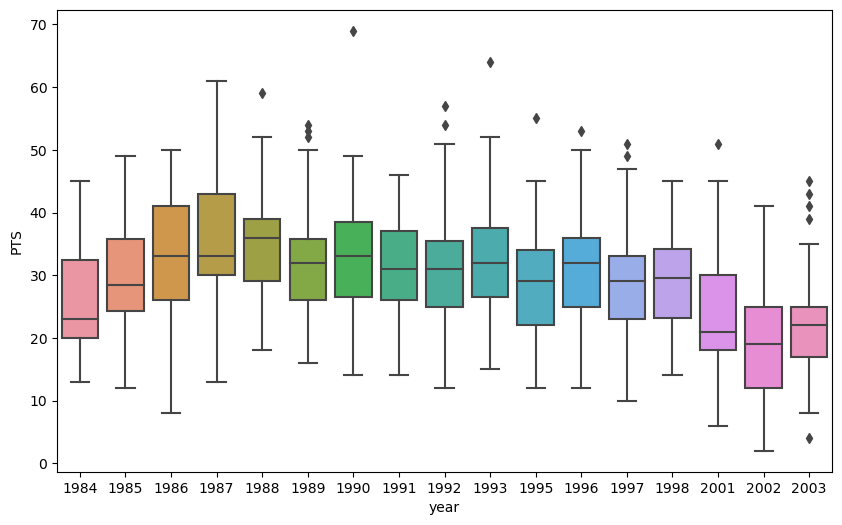

In [34]:
def box_plot(x_box,y_box,df):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=x_box, y=y_box, data=df)

box_plot('year', 'PTS', df)


Text(0, 0.5, 'Number of Games')

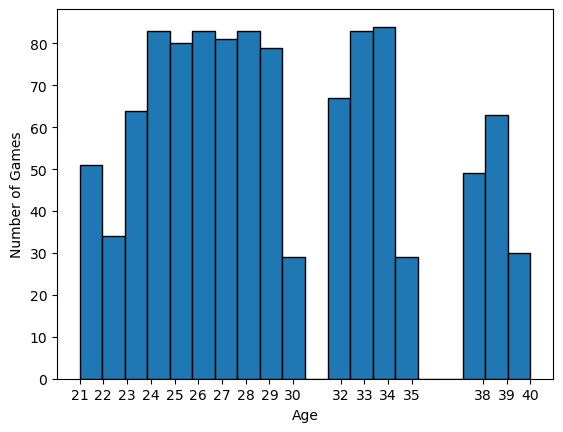

In [29]:
df['Age'].hist(bins=20, edgecolor = "black")

plt.xticks(list(set(list(df['Age']))))
plt.grid(False)
plt.xlabel("Age")
plt.ylabel("Number of Games")